https://docs.h2o.ai/h2o/latest-stable/h2o-docs/admissibleml-code-examples/Train-model-subsets-Python.ipynb

## TODO

Debug

```
AttributeError: type object 'ModelBase' has no attribute 'train_subset_models'
```

Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,16 hours 30 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,3 months and 27 days !!!
H2O_cluster_name:,H2O_started_from_R_stever7_qfi986
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,22.22 Gb
H2O_cluster_total_cores:,64
H2O_cluster_allowed_cores:,64
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
infogram Model Build progress: |█████████████████████████████████████████████████| (done) 100%


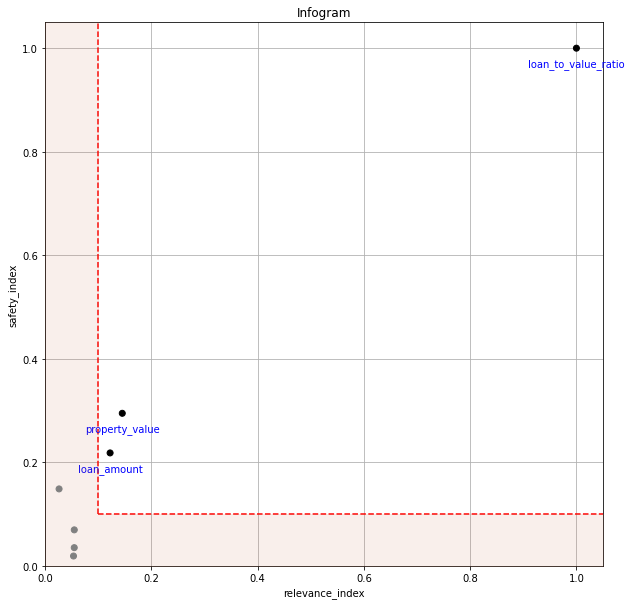

column,admissible,admissible_index,relevance_index,safety_index,cmi_raw
loan_to_value_ratio,1,1,1,1,0.0941406
property_value,1,0.232405,0.145431,0.294744,0.0277474
loan_amount,1,0.176956,0.122526,0.218206,0.0205421
income,0,0.106802,0.0265004,0.148697,0.0139985
intro_rate_period,0,0.0627864,0.0551325,0.0696038,0.00655254
loan_term,0,0.046236,0.0550699,0.0352539,0.00331882
debt_to_income_ratio,0,0.0402932,0.0537012,0.0190596,0.00179428


In [1]:
import h2o
from h2o.automl import *
from h2o.estimators.infogram import H2OInfogram

h2o.connect()

# Import HDMA dataset
f = "https://erin-data.s3.amazonaws.com/admissible/data/hmda_lar_2018_sample.csv"
col_types = {'high_priced': "enum"}
df = h2o.import_file(path=f, col_types=col_types)

# We will split the data so that we can test/compare performance
# of admissible vs non-admissible models later
train, test = df.split_frame(ratios=[0.8], seed=1)

# Response column and predictor columns
y = "high_priced"
x =  ["loan_amount",
      "loan_to_value_ratio",
      "loan_term",
      "intro_rate_period",
      "property_value",
      "income",
      "debt_to_income_ratio"]

# Fairness related information
protected_columns = ["derived_race", "derived_sex"]
reference = ["White", "Male"]
favorable_class = "0"

# Infogram
ig = H2OInfogram(protected_columns=protected_columns)
ig.train(y=y, x=x, training_frame=train)
ig.plot()

# Admissible score frame
asf = ig.get_admissible_score_frame()
asf

In [2]:
# Train models on different subsets of features selected by infogram
# da = ig.train_subset_models(H2OAutoML, y, train, test, protected_columns, reference, favorable_class, max_models=10, seed=1)
# da
# AttributeError: type object 'ModelBase' has no attribute 'train_subset_models'

In [3]:
# Select the best models with respect to AUC and AIR
# h2o.explanation.pareto_front(da, x_metric="auc", y_metric="significant_air_min", optimum="top right", color_col="algo")

In [4]:
# Pick a model that satisfies the four fifths rule
# potentially_fair_model = h2o.get_model(da[da["significant_air_min"] > 0.8, "model_id"][0, 0])

In [5]:
# Inspect the model
# potentially_fair_model.inspect_model_fairness(test, protected_columns, reference, favorable_class);